In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline


In [2]:
'''
reading from google drive dataset
'''
anyoneWithLink='https://drive.google.com/file/d/1Ml7hnhafNkbXcTzbsCcic4k-eSSkXDCK/view?usp=sharing'
path='https://drive.google.com/uc?export=download&id='+anyoneWithLink.split('/')[-2]
aqiDf=pd.read_csv(path)

In [3]:
aqiDf.shape

(29531, 16)

In [4]:
aqiDf.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
aqiDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
aqiDf.groupby('City').size()

City
Ahmedabad             2009
Aizawl                 113
Amaravati              951
Amritsar              1221
Bengaluru             2009
Bhopal                 289
Brajrajnagar           938
Chandigarh             304
Chennai               2009
Coimbatore             386
Delhi                 2009
Ernakulam              162
Gurugram              1679
Guwahati               502
Hyderabad             2006
Jaipur                1114
Jorapokhar            1169
Kochi                  162
Kolkata                814
Lucknow               2009
Mumbai                2009
Patna                 1858
Shillong               310
Talcher                925
Thiruvananthapuram    1112
Visakhapatnam         1462
dtype: int64

In [7]:
'''
We want to estimate for country so dropping city and also AQI doesn't depend on city name
'''
aqiDf.drop(['City','Date'],axis=1,inplace=True)

'''
 dropping unlabeled data
'''
aqiDf.dropna(subset=['AQI'],inplace=True)

In [8]:
aqiDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24850 entries, 28 to 29530
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       24172 non-null  float64
 1   PM10        17764 non-null  float64
 2   NO          24463 non-null  float64
 3   NO2         24459 non-null  float64
 4   NOx         22993 non-null  float64
 5   NH3         18314 non-null  float64
 6   CO          24405 non-null  float64
 7   SO2         24245 non-null  float64
 8   O3          24043 non-null  float64
 9   Benzene     21315 non-null  float64
 10  Toluene     19024 non-null  float64
 11  Xylene      9478 non-null   float64
 12  AQI         24850 non-null  float64
 13  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(1)
memory usage: 2.8+ MB


# Missing value checking

In [9]:
aqiDf.isnull().sum()

PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
dtype: int64

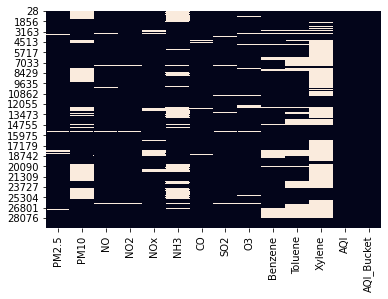

In [10]:
sns.heatmap(aqiDf.isnull(),cbar=False)

In [11]:
'''
We will drop AQI_Bucket cause its simply the label of AQI and also they are so many null of them 
'''

aqiDf.drop(['AQI_Bucket'],axis=1,inplace=True)

In [12]:
'''
as most of the Xylene feature is null so dropping it 
'''
aqiDf.drop(['Xylene'],axis=1,inplace=True)

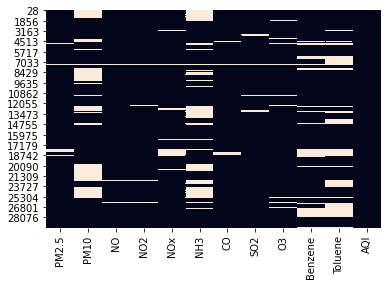

In [13]:
sns.heatmap(aqiDf.isnull(),cbar=False)

Let's see if the missing featrue is important or we will drop them

# Corrrelations

In [14]:
aqiDf.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
PM2.5,1.000000,0.853200,0.459610,0.366404,0.451946,0.282001,0.093524,0.136998,0.167262,0.020743,0.119306,0.659181
PM10,0.853200,1.000000,0.530343,0.483121,0.544327,0.392048,0.116719,0.260924,0.251704,0.018284,0.168939,0.803313
NO,0.459610,0.530343,1.000000,0.488197,0.801345,0.184721,0.217054,0.189123,0.017864,0.041796,0.153376,0.452191
NO2,0.366404,0.483121,0.488197,1.000000,0.633837,0.236165,0.371186,0.425414,0.295962,0.027901,0.274811,0.537071
NOx,0.451946,0.544327,0.801345,0.633837,1.000000,0.161563,0.248999,0.259134,0.096364,0.046627,0.202927,0.486450
NH3,0.282001,0.392048,0.184721,0.236165,0.161563,1.000000,0.114204,-0.028089,0.095282,-0.015771,0.010554,0.252019
CO,0.093524,0.116719,0.217054,0.371186,0.248999,0.114204,1.000000,0.511013,0.041634,0.047629,0.273694,0.683346
SO2,0.136998,0.260924,0.189123,0.425414,0.259134,-0.028089,0.511013,1.000000,0.171489,0.039395,0.313578,0.490586
O3,0.167262,0.251704,0.017864,0.295962,0.096364,0.095282,0.041634,0.171489,1.000000,0.018140,0.128536,0.198991
Benzene,0.020743,0.018284,0.041796,0.027901,0.046627,-0.015771,0.047629,0.039395,0.018140,1.000000,0.764280,0.044407


In [15]:
aqiDf.corr()['AQI'].sort_values(ascending=False)

AQI        1.000000
PM10       0.803313
CO         0.683346
PM2.5      0.659181
NO2        0.537071
SO2        0.490586
NOx        0.486450
NO         0.452191
Toluene    0.279992
NH3        0.252019
O3         0.198991
Benzene    0.044407
Name: AQI, dtype: float64

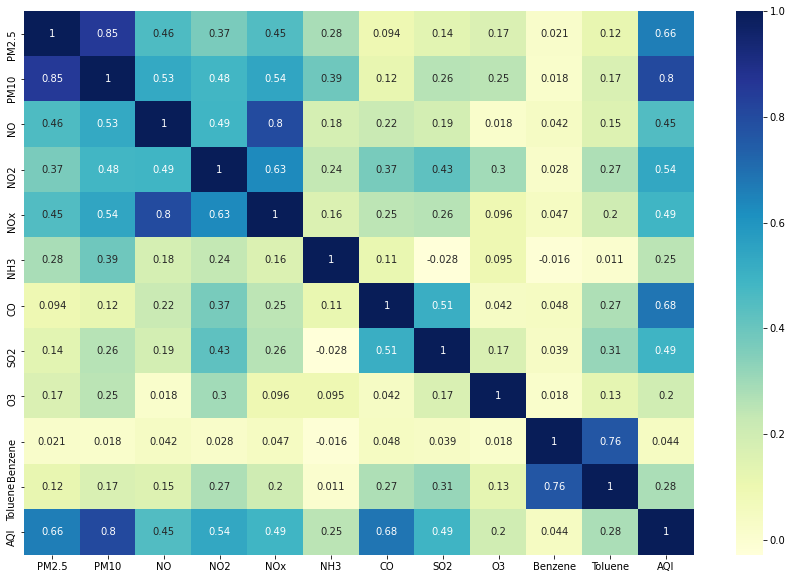

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(aqiDf.corr(),annot=True,cmap="YlGnBu")

In [17]:
'''
 as Benzene is less correlated with AQI 
'''
aqiDf.drop(['NH3','Benzene','Toluene','O3','NO'],axis=1,inplace=True)

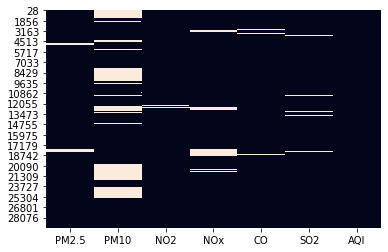

In [18]:
sns.heatmap(aqiDf.isnull(),cbar=False)

In [19]:
aqiDf.corr()['AQI'].sort_values(ascending=False)

AQI      1.000000
PM10     0.803313
CO       0.683346
PM2.5    0.659181
NO2      0.537071
SO2      0.490586
NOx      0.486450
Name: AQI, dtype: float64

# Dropping Rows where missing values in PM10


In [20]:
aqiDf=aqiDf.dropna(subset=['PM10'])

# Filling missing values with mean

In [21]:
aqiDf=aqiDf.fillna(aqiDf.median())

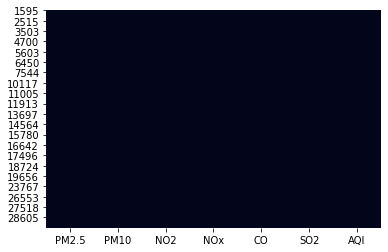

In [22]:
sns.heatmap(aqiDf.isnull(),cbar=False)

# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split,cross_validate

X = aqiDf.drop(columns=['AQI'])
y = aqiDf['AQI']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Data Standardization

In [24]:
'''
Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale data.
'''

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

# Neural Network with scklearn 

In [25]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(random_state=1,hidden_layer_sizes=(19,19),activation='relu',solver='adam',max_iter=300)
nn.fit(X_train, y_train)
test_preds=nn.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Evaluation

In [26]:
'''
got score = 0.9111186031607955
'''
print(nn.score(X_test,y_test))

0.9132200469443953


Text(0, 0.5, 'Predicted values')

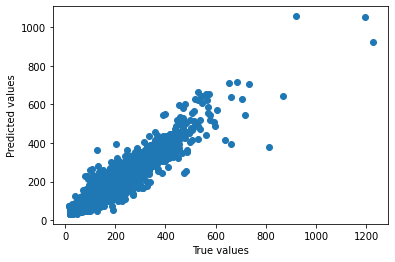

In [27]:
plt.scatter(y_test,test_preds)
plt.xlabel('True values')
plt.ylabel('Predicted values')